In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from scipy.signal import lfilter
plt.style.use('fivethirtyeight')
%matplotlib inline

In [83]:
data = pd.read_csv('csv/results.csv')

In [84]:
cate = []

for i in range(data.shape[0]):
    if data.iloc[:, 0][i] <10:
        cate.append(10)
    elif  data.iloc[:, 0][i] >=10 and  data.iloc[:, 0][i] < 30:
        cate.append(20)
    elif  data.iloc[:, 0][i] >= 30 and  data.iloc[:, 0][i] <40:
        cate.append(30)
    else: 
        cate.append(40)
        
cate = np.array(cate)
cate.shape
data['percent'] = cate

## Pie Chart

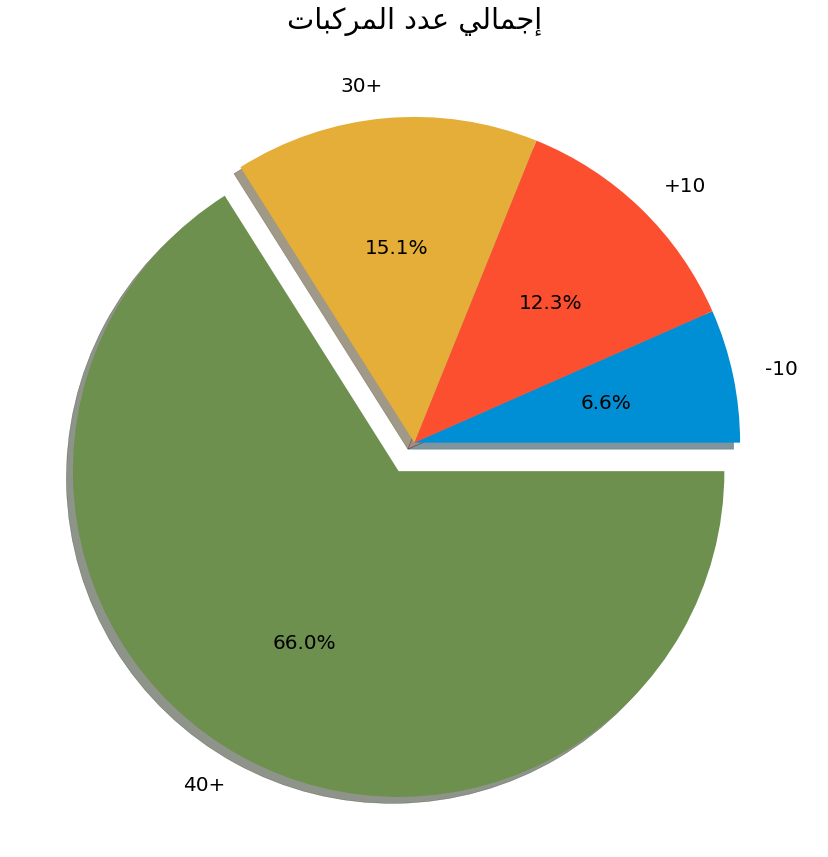

In [123]:
size = [175, 325, 399, 1748]
explode = (0,0,0,0.1)
categories = ['-10', '+10', '30+', '40+']
plt.figure(figsize=(13,15))
plt.title(get_display(reshape('إجمالي عدد المركبات')))
plt.pie(size, labels=categories, autopct='%1.1f%%', shadow= True, explode=explode)
plt.savefig('graphs/pie.jpg')

## Dist Plot

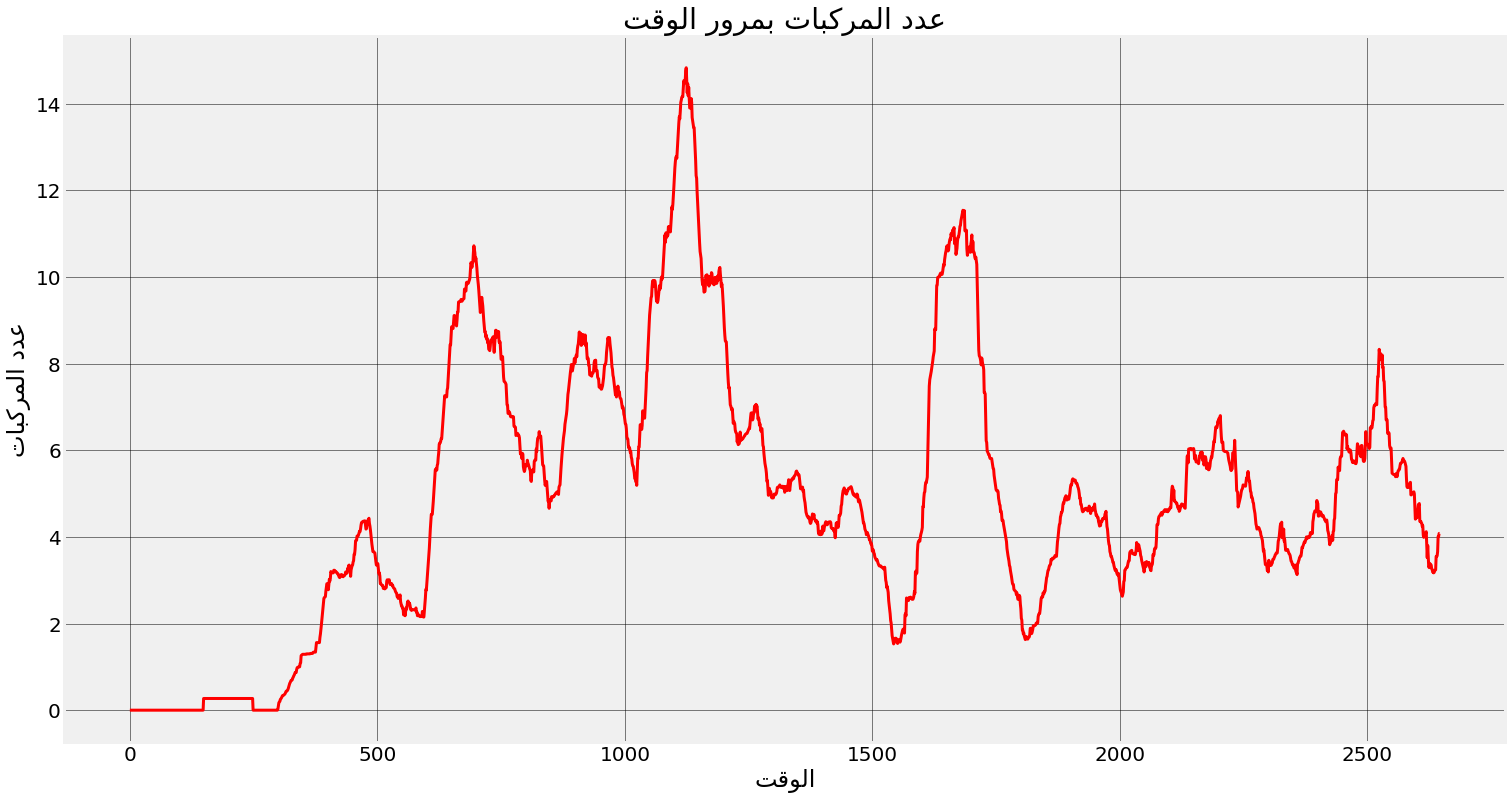

In [124]:
n = 100
b = [1.0 / n]*n
a = 1

yy = lfilter(b,a, data.iloc[:, 1])

plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(23,13))
plt.grid(True, alpha=0.5, color='black')
plt.plot(range(2647), yy, color='red', linewidth=3)
plt.xlabel(get_display(reshape('الوقت')))
plt.ylabel(get_display(reshape('عدد المركبات')))
plt.title(get_display(reshape('عدد المركبات بمرور الوقت')))
plt.savefig('graphs/dist.jpg')
plt.show()